In [1]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
lst_data = glob('./data/*')
var_data = ['cust_demo', 'prod_buy', 'service_use', 'prod_cat', 'partner', 'lpay']
for name, file in zip(var_data, lst_data):
    globals()[name] = pd.read_csv(file)

C:\Users\KwonYujin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
for name in var_data:
    print(name, ': ', globals()[name].shape)

cust_demo :  (29913, 4)
prod_buy :  (4381743, 10)
service_use :  (248304, 9)
prod_cat :  (1933, 4)
partner :  (8808, 4)
lpay :  (353184, 7)


In [4]:
prod_buy.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct'],
      dtype='object')

In [5]:
prod_buy['de_dt'] = pd.to_datetime(prod_buy['de_dt'], format='%Y%m%d')
service_use['de_dt'] = pd.to_datetime(service_use['de_dt'], format='%Y%m%d')
lpay['de_dt'] = pd.to_datetime(lpay['de_dt'], format='%Y%m%d')

In [6]:
prod_buy['de_month'] = prod_buy.de_dt.dt.month_name()
service_use['de_month'] = service_use.de_dt.dt.month_name()
lpay['de_month'] = lpay.de_dt.dt.month_name()

prod_buy['de_wday'] = prod_buy.de_dt.dt.day_name()
service_use['de_wday'] = service_use.de_dt.dt.day_name()
lpay['de_wday'] = lpay.de_dt.dt.day_name()

In [7]:
prod_buy['de_month'] = prod_buy['de_month'].astype('category')
service_use['de_month'] = service_use['de_month'].astype('category')
lpay['de_month'] = lpay['de_month'].astype('category')

cats = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
prod_buy['de_month'] = prod_buy['de_month'].cat.reorder_categories(cats)
service_use['de_month'] = service_use['de_month'].cat.reorder_categories(cats)
lpay['de_month'] = lpay['de_month'].cat.reorder_categories(cats)

In [8]:
prod_buy['de_wday'] = prod_buy['de_wday'].astype('category')
service_use['de_wday'] = service_use['de_wday'].astype('category')
lpay['de_wday'] = lpay['de_wday'].astype('category')

prod_buy['de_wday'] = prod_buy['de_wday'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
service_use['de_wday'] = service_use['de_wday'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
lpay['de_wday'] = lpay['de_wday'].cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

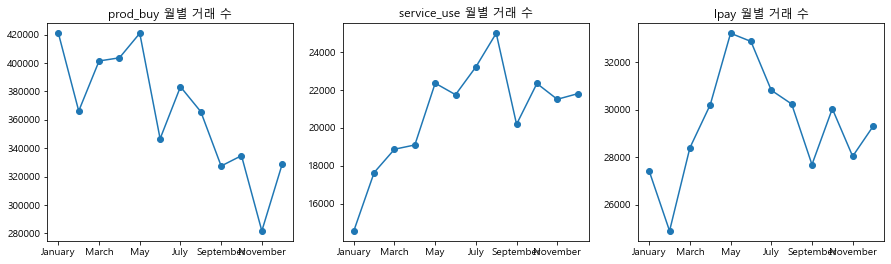

In [9]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
prod_buy.de_month.value_counts(sort=False).plot(ax=axes[0], marker='o')
axes[0].set_title('prod_buy 월별 거래 수')
service_use.de_month.value_counts(sort=False).plot(ax=axes[1], marker='o')
axes[1].set_title('service_use 월별 거래 수')
lpay.de_month.value_counts(sort=False).plot(ax=axes[2], marker='o')
axes[2].set_title('lpay 월별 거래 수')
plt.show()

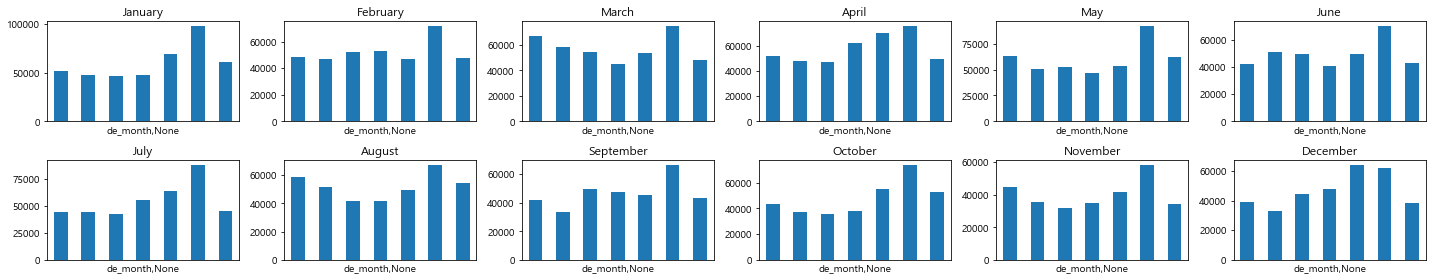

In [10]:
fig, axes = plt.subplots(2,6, figsize=(20,4))
data = prod_buy.groupby('de_month').de_wday.value_counts(sort=False)
for i in range(12):
    d = data[i*7:(i+1)*7]
    d.plot.bar(ax=axes[i//6, i%6], xticks=[])
    axes[i//6, i%6].set_title(d.index[0][0])
plt.tight_layout()
plt.show()

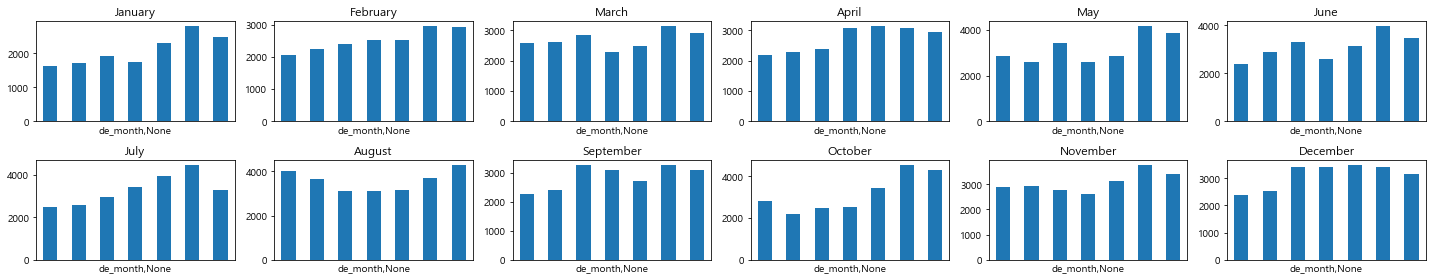

In [11]:
fig, axes = plt.subplots(2,6, figsize=(20,4))
data = service_use.groupby('de_month').de_wday.value_counts(sort=False)
for i in range(12):
    d = data[i*7:(i+1)*7]
    d.plot.bar(ax=axes[i//6, i%6], xticks=[])
    axes[i//6, i%6].set_title(d.index[0][0])
plt.tight_layout()
plt.show()

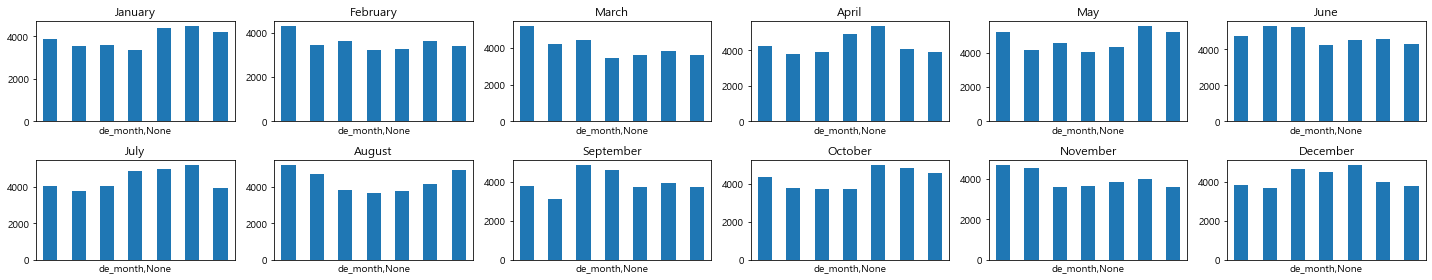

In [12]:
fig, axes = plt.subplots(2,6, figsize=(20,4))
data = lpay.groupby('de_month').de_wday.value_counts(sort=False)
for i in range(12):
    d = data[i*7:(i+1)*7]
    d.plot.bar(ax=axes[i//6, i%6], xticks=[])
    axes[i//6, i%6].set_title(d.index[0][0])
plt.tight_layout()
plt.show()

lpay 가입 유저와 아닌 유저 차이?

In [13]:
prod_cust = set(prod_buy.cust.unique())
service_cust = set(service_use.cust.unique())
lpay_cust = set(lpay.cust.unique())

In [14]:
only_prod = list(prod_cust - lpay_cust)
only_service = list(service_cust - lpay_cust)
only_lpay = list(lpay_cust - prod_cust - service_cust)

In [15]:
df_prod_only = prod_buy.query('cust in @only_prod')
df_service_only = service_use.query('cust in @only_service')
df_prod_lpay = prod_buy.query('cust in @lpay_cust')
df_service_lpay = service_use.query('cust in @lpay_cust')

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


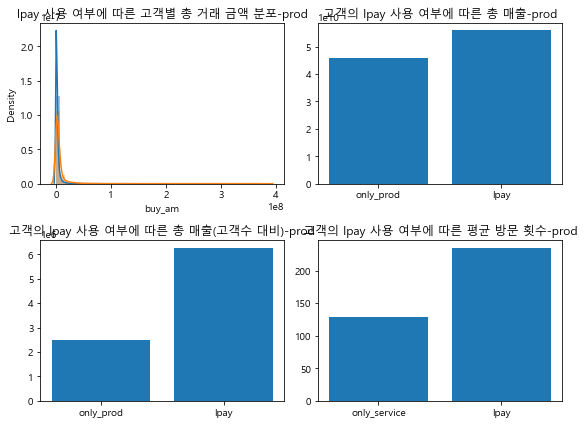

In [16]:
fig, axes = plt.subplots(2,2, figsize=(8,6))
sns.distplot(df_prod_only.groupby('cust').buy_am.sum(), ax=axes[0,0])
sns.distplot(df_prod_lpay.groupby('cust').buy_am.sum(), ax=axes[0,0])
axes[0,0].set_title('lpay 사용 여부에 따른 고객별 총 거래 금액 분포-prod')
axes[0,1].bar(['only_prod', 'lpay'], [df_prod_only.groupby('cust').buy_am.sum().sum(), df_prod_lpay.groupby('cust').buy_am.sum().sum()])
axes[0,1].set_title('고객의 lpay 사용 여부에 따른 총 매출-prod')
axes[1,0].bar(['only_prod', 'lpay'], [df_prod_only.groupby('cust').buy_am.sum().sum()/len(only_prod), df_prod_lpay.groupby('cust').buy_am.sum().sum()/len(lpay_cust)])
axes[1,0].set_title('고객의 lpay 사용 여부에 따른 총 매출(고객수 대비)-prod')
axes[1,1].bar(['only_service', 'lpay'], [df_prod_only.groupby('cust').cust.count().mean(), df_prod_lpay.groupby('cust').cust.count().mean()])
axes[1,1].set_title('고객의 lpay 사용 여부에 따른 평균 방문 횟수-prod')
plt.tight_layout()
plt.show()

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


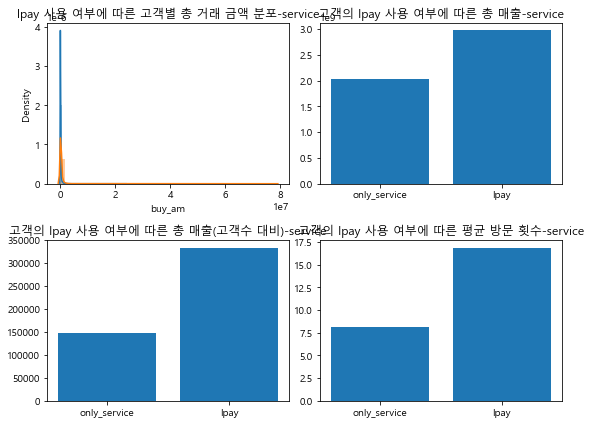

In [17]:
fig, axes = plt.subplots(2,2, figsize=(8,6))
sns.distplot(df_service_only.groupby('cust').buy_am.sum(), ax=axes[0,0])
sns.distplot(df_service_lpay.groupby('cust').buy_am.sum(), ax=axes[0,0])
axes[0,0].set_title('lpay 사용 여부에 따른 고객별 총 거래 금액 분포-service')
axes[0,1].bar(['only_service', 'lpay'], [df_service_only.groupby('cust').buy_am.sum().sum(), df_service_lpay.groupby('cust').buy_am.sum().sum()])
axes[0,1].set_title('고객의 lpay 사용 여부에 따른 총 매출-service')
axes[1,0].bar(['only_service', 'lpay'], [df_service_only.groupby('cust').buy_am.sum().sum()/len(only_service), df_service_lpay.groupby('cust').buy_am.sum().sum()/len(lpay_cust)])
axes[1,0].set_title('고객의 lpay 사용 여부에 따른 총 매출(고객수 대비)-service')
axes[1,1].bar(['only_service', 'lpay'], [df_service_only.groupby('cust').cust.count().mean(), df_service_lpay.groupby('cust').cust.count().mean()])
axes[1,1].set_title('고객의 lpay 사용 여부에 따른 평균 방문 횟수-service')
plt.tight_layout()
plt.show()

$\rightarrow$ 확실히 많이 팔아주고 많이 방문하는 사람들은 lpay 가입자다!

In [18]:
df_lpay_prod = lpay[lpay.cop_c.map(lambda x: x.startswith('A'))]
df_lpay_service = lpay[lpay.cop_c.map(lambda x: x.startswith('A')==False)]

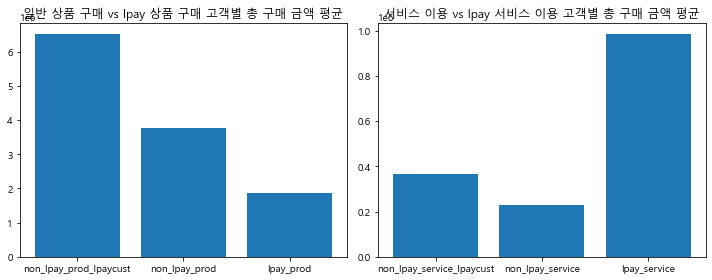

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['non_lpay_prod_lpaycust', 'non_lpay_prod', 'lpay_prod'], [df_prod_lpay.groupby('cust').buy_am.sum().mean(), prod_buy.groupby('cust')['buy_am'].sum().mean(), df_lpay_prod.groupby('cust')['buy_am'].sum().mean()])
axes[0].set_title('일반 상품 구매 vs lpay 상품 구매 고객별 총 구매 금액 평균')
axes[1].bar(['non_lpay_service_lpaycust', 'non_lpay_service', 'lpay_service'], [df_service_lpay.groupby('cust').buy_am.sum().mean(), service_use.groupby('cust')['buy_am'].sum().mean(), df_lpay_service.groupby('cust')['buy_am'].sum().mean()])
axes[1].set_title('서비스 이용 vs lpay 서비스 이용 고객별 총 구매 금액 평균')
plt.tight_layout()
plt.show()

$\rightarrow$ 상품은 lpay를 사용하지 않는 비율이 훨씬 높지만, 서비스는 lpay를 많이 사용!

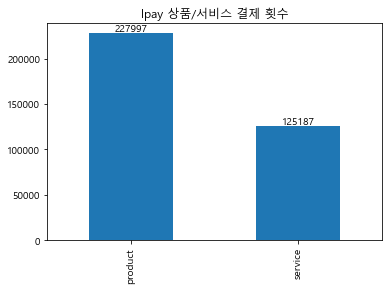

In [20]:
data = lpay.cop_c.map(lambda x: x.startswith('A')).value_counts()
data.plot.bar()
plt.title('lpay 상품/서비스 결제 횟수')
plt.xticks(ticks=[0,1] ,labels=['product', 'service'])
for idx, value in enumerate(data):
    plt.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
plt.show()

In [21]:
df_lpay_prod.buy_am.describe()

count    2.279970e+05
mean     6.517905e+04
std      3.266697e+05
min      1.000000e+01
25%      8.040000e+03
50%      2.200000e+04
75%      5.217000e+04
max      2.755000e+07
Name: buy_am, dtype: float64

In [22]:
df_lpay_service.buy_am.describe()

count    1.251870e+05
mean     5.285791e+04
std      3.675734e+05
min      5.000000e+00
25%      6.000000e+03
50%      1.700000e+04
75%      3.867950e+04
max      3.000000e+07
Name: buy_am, dtype: float64

lpay, service, product에 다 있는 사람은 어떤 사람이냐? (lpay에 있는 사람 대부분이 이럼)

In [23]:
service_use.chnl_dv.value_counts()

1    213525
2     34779
Name: chnl_dv, dtype: int64

In [24]:
prod_buy.chnl_dv.value_counts()

1    3953242
2     428501
Name: chnl_dv, dtype: int64

In [25]:
lpay.chnl_dv.value_counts()

2    203174
1    150010
Name: chnl_dv, dtype: int64

In [26]:
prod_buy.groupby('cust').cop_c.nunique()

cust
M000034966    3
M000136117    3
M000201112    1
M000225114    2
M000261625    1
             ..
M999599111    4
M999673157    2
M999770689    4
M999849895    3
M999962961    5
Name: cop_c, Length: 26917, dtype: int64

In [27]:
service_use.groupby('cust').cop_c.nunique()

cust
M000034966    1
M000059535    1
M000136117    1
M000225114    3
M000261625    1
             ..
M999708287    1
M999770689    3
M999849895    1
M999926092    3
M999962961    4
Name: cop_c, Length: 21769, dtype: int64

In [28]:
lpay.groupby('cust').cop_c.nunique()

cust
M000136117    3
M000419293    6
M000494848    4
M000557840    1
M000871427    3
             ..
M999227380    1
M999268192    5
M999599111    3
M999770689    7
M999962961    6
Name: cop_c, Length: 8906, dtype: int64

유통사 확인

In [29]:
prod_buy.cop_c.unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06'], dtype=object)

In [30]:
df1 = prod_buy.groupby('cust').rct_no.count().reset_index().rename(columns={'rct_no':'prod_buy'})
df2 = service_use.groupby('cust').rct_no.count().reset_index().rename(columns={'rct_no':'service_use'})
df3 = lpay.groupby('cust').rct_no.count().reset_index().rename(columns={'rct_no':'lpay'})
rcts = pd.merge(df1, df2, on='cust', how='outer')
rcts = pd.merge(rcts, df3, on='cust', how='outer').fillna(0)

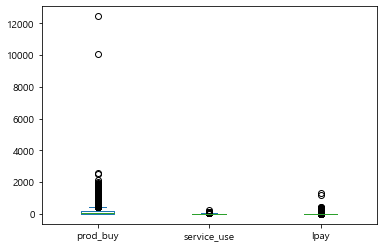

,prod_buy,service_use,lpay
count,29874.000000,29874.000000,29874.000000
mean,146.674131,8.311709,11.822454
std,221.298693,11.133733,36.697546
min,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000
50%,71.000000,4.000000,0.000000
75%,193.000000,12.000000,3.000000
max,12448.000000,261.000000,1334.000000


In [31]:
rcts.plot.box()
plt.show()
display(rcts.describe())

#### lpay

In [32]:
lpay['cop_product'] = lpay.cop_c.map(lambda x: 'A' if x.startswith('A') else 'not_A')

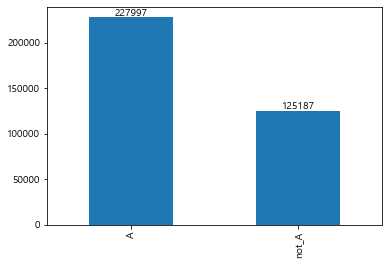

In [33]:
data = lpay.cop_product.value_counts()
data.plot.bar()
for idx, value in enumerate(data):
    plt.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
plt.show()

In [34]:
trans = pd.merge(prod_buy, prod_cat, on='pd_c', how='left')

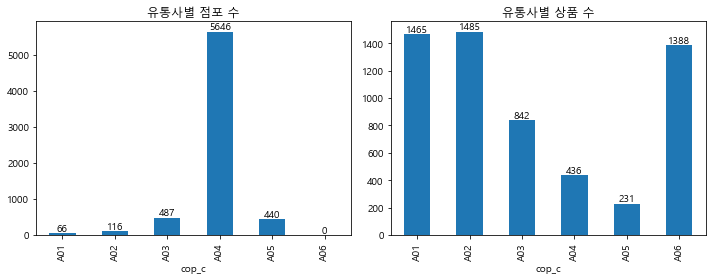

In [35]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
data1 = prod_buy.groupby('cop_c').br_c.nunique()
data1.plot.bar(ax=axes[0])
for idx, value in enumerate(data1):
    axes[0].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
axes[0].set_title('유통사별 점포 수')
data2 = prod_buy.groupby('cop_c').pd_c.nunique()
data2.plot.bar(ax=axes[1])
for idx, value in enumerate(data2):
    axes[1].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
axes[1].set_title('유통사별 상품 수')
plt.tight_layout()
plt.show()

In [36]:
prod_buy.query('cop_c == "A06"').chnl_dv.unique()

array([2], dtype=int64)

- A: 유통(6)
  - 롯데 백화점, 롯데 마트, 롯데 슈퍼, 코리아 세븐, 롯데하이마트, 롯데홈쇼핑, 롯데e-커머스, 롯데롭스, 롯데멤버스, 롯데컬쳐웍스(롯데시네마), 에프알엘코리아(유니클로)
    - A01: 음식점(임대료, 푸드코트)이 압도적, 패션이 그 다음, 조리식품 등
    - A02: 채소, 과자, 유제품 등 (의류, 도구 등도 소량)
    - A03: A02와 유사, 종량제 최다, 거의 식료품
    - A04: 음료, 과자, 담배 등(편의점, 슈퍼)
    - A05: 가전 압도적
    - A06: 상품권 압도적, 옷 - 온라인 거래만 존재

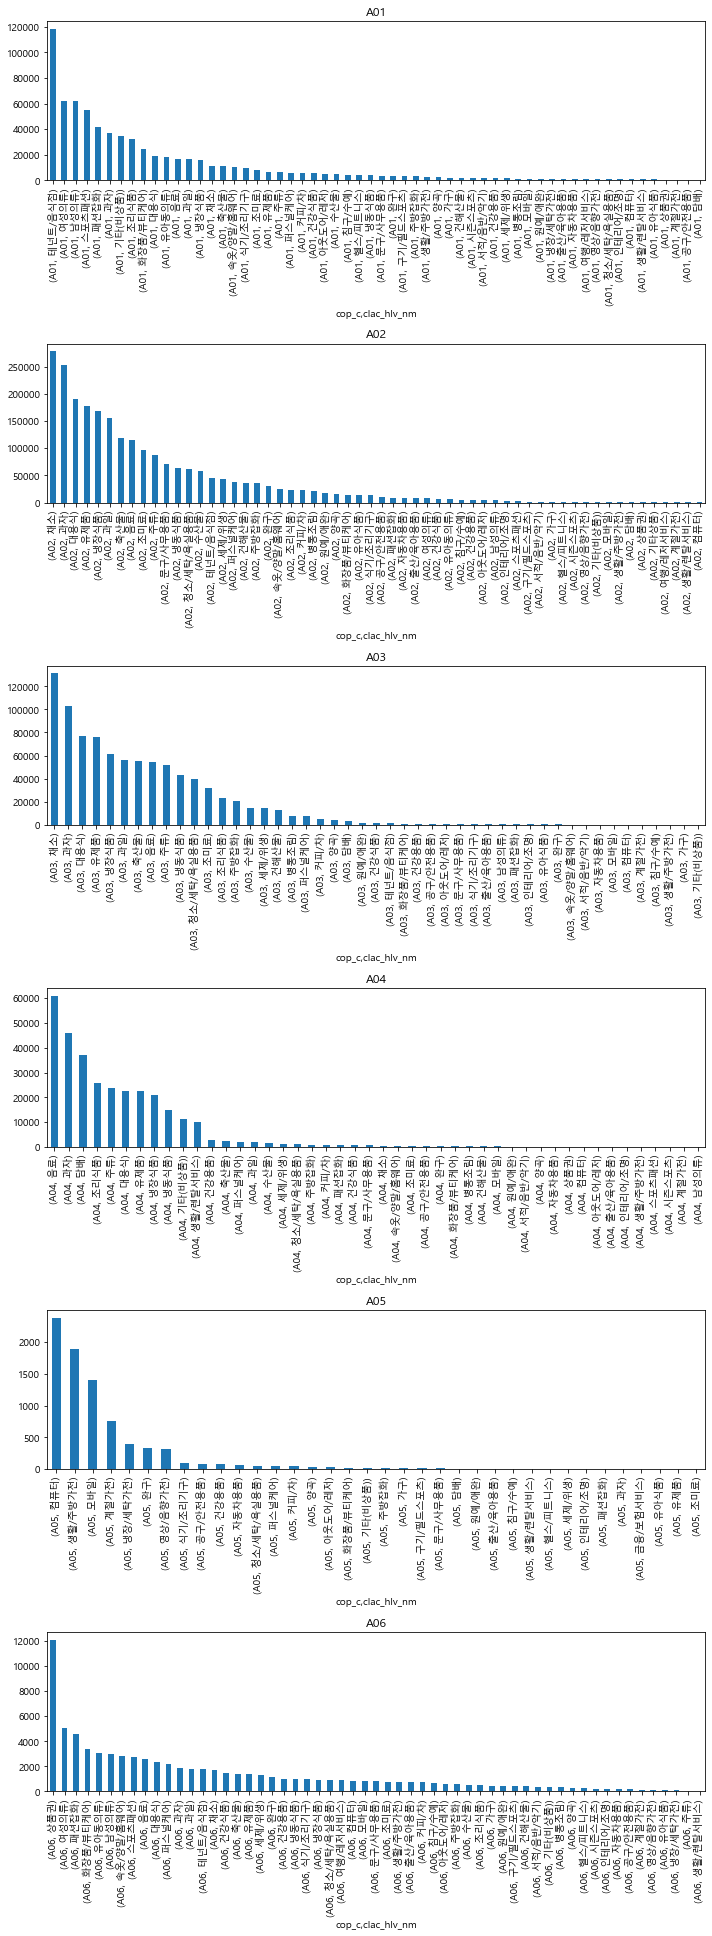

In [37]:
data = trans.groupby('cop_c').clac_hlv_nm.value_counts()

fig, axes = plt.subplots(6,1,figsize=(10,27))
for idx, value in enumerate(sorted(trans.cop_c.unique())):
    data.iloc[list(map(lambda x: x[0]==f'A0{idx+1}', data.index))].plot.bar(ax=axes[idx])
    axes[idx].set_title(value)
plt.tight_layout()
plt.show()

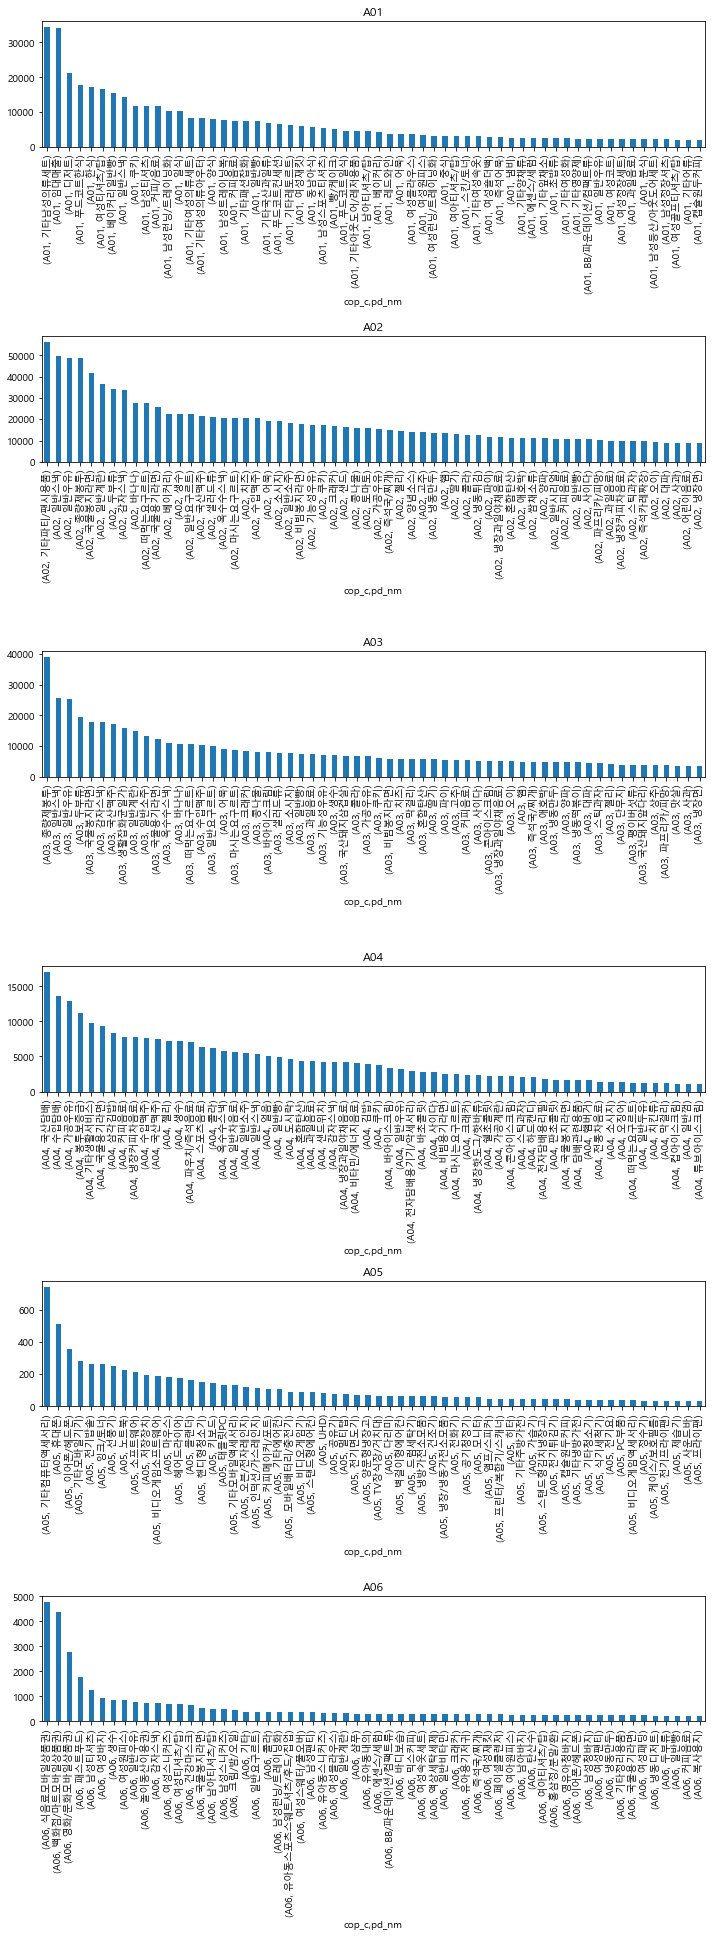

In [38]:
data = trans.groupby('cop_c').pd_nm.value_counts()

fig, axes = plt.subplots(6,1,figsize=(10,27))
for idx, value in enumerate(sorted(trans.cop_c.unique())):
    data.iloc[list(map(lambda x: x[0]==f'A0{idx+1}', data.index))].iloc[:60].plot.bar(ax=axes[idx])
    axes[idx].set_title(value)
plt.tight_layout()
plt.show()

In [39]:
trans_serv = pd.merge(service_use, partner, on=['cop_c', 'br_c'], how='left')

In [40]:
cust_demo.ma_fem_dv = cust_demo.ma_fem_dv.astype('category')
cust_demo.ma_fem_dv = cust_demo.ma_fem_dv.cat.reorder_categories(['남성', '여성'])

cust_demo.ages = cust_demo.ages.astype('category')
cust_demo.ages = cust_demo.ages.cat.reorder_categories([f'{i}0대' for i in range(2,8)])

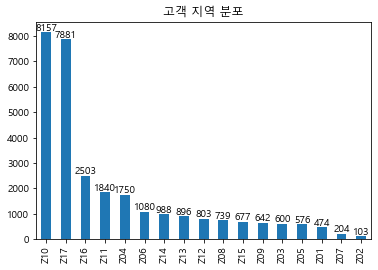

In [41]:
data = cust_demo.zon_hlv.value_counts()
data.plot.bar()
plt.title('고객 지역 분포')
for idx, value in enumerate(data):
    plt.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
plt.show()

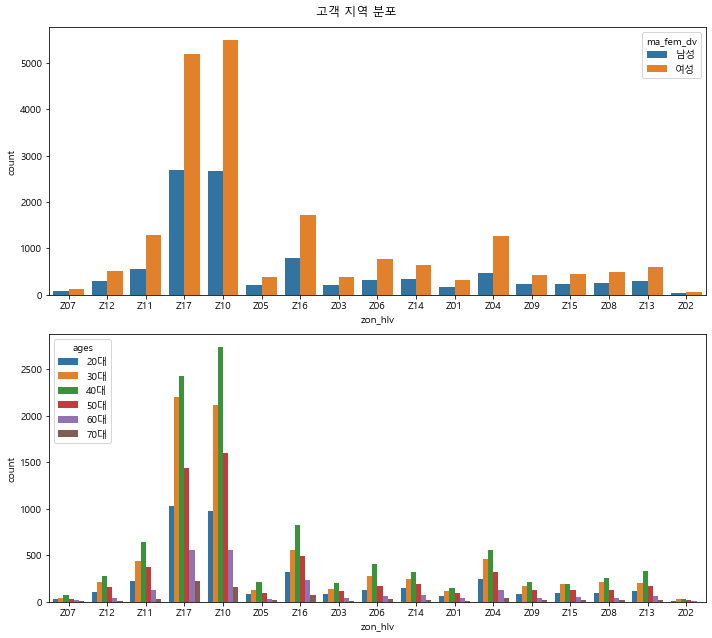

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(10,9))
sns.countplot(data=cust_demo, x='zon_hlv', hue='ma_fem_dv', ax=axes[0])
sns.countplot(data=cust_demo, x='zon_hlv', hue='ages', ax=axes[1])
plt.suptitle('고객 지역 분포')
plt.tight_layout()
plt.show()

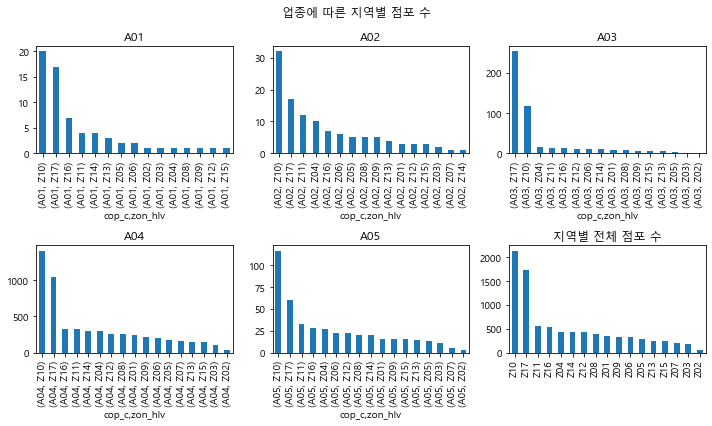

In [43]:
fig, axes = plt.subplots(2,3, figsize=(10,6))

lst = [f'A0{i}' for i in range(1,6)]
data = partner.query('cop_c in @lst').groupby('cop_c').zon_hlv.value_counts()
for idx, value in enumerate(lst):
    data.iloc[list(map(lambda x: x[0]==value, data.index))].plot.bar(ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(value)
partner.zon_hlv.value_counts().plot.bar(ax=axes[1,2])
axes[1,2].set_title('지역별 전체 점포 수')
plt.suptitle('업종에 따른 지역별 점포 수')
plt.tight_layout()
plt.show()

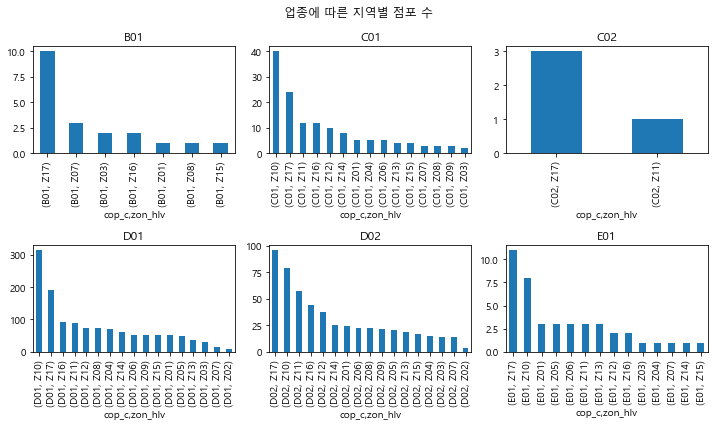

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
data = partner.groupby('cop_c').zon_hlv.value_counts()
for idx, value in enumerate(sorted(trans_serv.cop_c.unique())):
    data.iloc[list(map(lambda x: x[0]==value, data.index))].plot.bar(ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(value)
plt.suptitle('업종에 따른 지역별 점포 수')
plt.tight_layout()
plt.show()

In [45]:
Z02, Z08, Z09

NameError: name 'Z02' is not defined

In [47]:
partner.query('cop_c == "C02"')

,br_c,cop_c,zon_hlv,zon_mcls
6915,C020001,C02,Z17,Z17018
6916,C020002,C02,Z17,Z17018
6917,C020003,C02,Z11,Z11004
6918,C020004,C02,Z17,Z17018


In [56]:
partner.groupby('zon_hlv').zon_mcls.nunique()

zon_hlv
Z01    18
Z02     1
Z03     5
Z04    11
Z05    22
Z06    15
Z07     2
Z08    18
Z09    15
Z10    46
Z11    23
Z12    22
Z13     5
Z14     8
Z15     5
Z16    16
Z17    25
Name: zon_mcls, dtype: int64

In [55]:
partner.query('zon_hlv == "Z15"')

,br_c,cop_c,zon_hlv,zon_mcls
9,A010010,A01,Z15,Z15003
126,A020061,A02,Z15,Z15004
130,A020065,A02,Z15,Z15004
135,A020070,A02,Z15,Z15004
202,A030021,A03,Z15,Z15004
...,...,...,...,...
8498,D020269,D02,Z15,Z15004
8683,D020458,D02,Z15,Z15003
8721,D020497,D02,Z15,Z15002
8722,D020498,D02,Z15,Z15003


In [48]:
sorted(partner.query('cop_c == "C02"').zon_mcls.unique())

['Z11004', 'Z17018']

In [ ]:
data = partner.groupby('zon_hlv').zon_hlv.count()
data.plot.bar()
for idx, value in enumerate(data):
    plt.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
plt.title('지역별 점포 수')
plt.show()

- zon_hlv: 시도
- zon_mcls: 구군

서울, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 인천, 대전, 광주, 경주, 울산, 부산, 제주

- B01: Z01, Z03, Z07, Z08, Z15, Z16, Z17
- C02: Z11, Z17

- 롯데시네마(C01)
  - 서울 33
  - 경기/인천 48
    - 경기 42
    - 인천 6
  - 충청/대전 11
    - 대전 4
    - 충북 4
    - 충남 3
  - 전라/광주 10
    - 광주 4
    - 전북 6
    - 전남 0
  - 경북/대구 18
    - 대구 8
    - 경북 10
  - 경남/부산/울산 26
    - 부산 10
    - 울산 2
    - 경남 14
  - 강원 4
  - 제주 3

- Z01: 강원, 충남, 대전 (숙박)
- Z02
- Z03: 울산 (숙박) 5
- Z04
- Z05
- Z06
- Z07: 제주(숙박) 3
- Z08: 강원, 충남, 대전 (숙박)
- Z09
- Z10: 경기(인구, 점포, not숙박) 2
- Z11: 경남(C02)
- Z12
- Z13
- Z14
- Z15: 강원, 충남, 대전 (숙박)
- Z16: 부산(숙박, 인구) 4
- Z17: 서울(인구, 점포, 숙박) 1

- A: 유통(6)
  - 롯데 백화점, 롯데 마트, 롯데 슈퍼, 코리아 세븐, 롯데하이마트, 롯데홈쇼핑, 롯데e-커머스, 롯데롭스, 롯데멤버스, 롯데컬쳐웍스, 에프엘알코리아
  - 롯데 백화점
    - 서울: 11
    - 인천: 1
    - 경기: 8
    - 부산: 4
    - 울산: 1
    - 대구: 2
    - 경북: 1
    - 경남: 2
    - 광주: 1
    - 전북: 1
    - 전남: 0
    - 대전: 1
  - 롯데 마트
    - 서울: 13
    - 부산: 8
    - 인천: 9
    - 대구: 2
    - 대전: 3
    - 광주: 4
    - 울산: 2
    - 경기: 33
    - 강원: 3
    - 충북: 5
    - 충남: 7
    - 경북: 3
    - 경남: 12
    - 전북: 7
    - 전남: 5
    - 제주: 1
    
- B: 숙박(1)
  - 롯데 리조트: 속초, 부여, 제주
  - 롯데 호텔: 서울(10), 부산(2), 울산(2), 제주(2), 대전(1)
- C: 엔터테인먼트(2)
  - C01: 롯데시네마
  - C02: 롯데 월드
    - 롯데월드 어드벤쳐(서울)
    - 롯데월드 어드벤쳐(부산) -> 2022년 개장
    - 롯데월드 워터파크(김해)
    - 롯데월드 아쿠아리움(서울)
    - 서울 스카이(서울)
- D: F&B(Food&Beverage) (2)
  - 롯데 제과, 칠성 음료, 롯데 푸드, 네슬레, 롯데 아사히 주류, 롯데피플네트웍스, 롯데중앙연구소, 롯데 지알에스
- E: 렌탈(1)
  - 롯데 렌탈? 너무 안맞는데?
    - 서울 62
    - 
- L: 기타 제휴사/비제휴사